<Figure size 1080x1800 with 0 Axes>

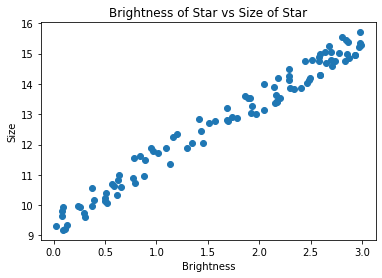

<Figure size 1080x1800 with 0 Axes>

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

# Generating Randomized dataset
X = 3*np.random.rand(100,1)
y = 9 + 2*X+np.random.rand(100,1)

# Scatter plot
plt.scatter(X,y)
plt.xlabel('Brightness')
plt.ylabel('Size')
plt.title('Brightness of Star vs Size of Star')
plt.figure(figsize=(15,25))

In [ ]:
# getting the threshold

thresh = np.median(y)
thresh

# now we are concluding that if size of star is bigger than thresh, then it is a BIG star
# otherwise it's a SMALL star

13.08234757512076

In [ ]:
# Adding a biasing constant of value 1 to the features array.
X_bias = np.c_[np.ones((len(X),1)),X]

In [ ]:
# Initializing a random value to W and b in the array called params
params = np.random.randn(2,1)
print(params)

[[ 0.13704682]
 [-1.86361017]]


In [ ]:
def predict(X_bias, params):
    return X_bias.dot(params)

In [ ]:
y_pred_init = predict(X_bias, params)
#y_pred_init
print("y predicted: ", y_pred_init[:5])
print("y original: ", y[:5])

y predicted:  [[-0.02271067]
 [-4.95388537]
 [-0.40809835]
 [-2.09711707]
 [-4.80642633]]
y original:  [[ 9.62874029]
 [14.75285414]
 [ 9.73895527]
 [12.34711383]
 [14.67651919]]


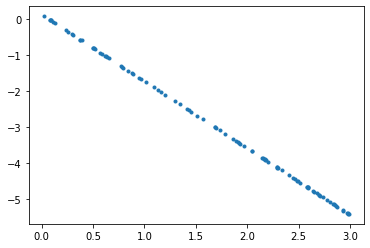

In [ ]:
plt.plot(X, y_pred_init, '.')

In [ ]:
# Learning Rate
alpha = 0.01

# Number of iterations
iterations = 3000

In [ ]:
def cost(params,X,y):
    '''
    Calculates cost of the function.
    X & y have their usual meaning.
    params - vector of coefficients.
    '''
    m = len(y)
    # Calculating Cost
    c = (1/2*m) * np.sum(np.square((X.dot(params))-y))  
    return c

In [ ]:
def gradient_descent(X,y,params,alpha,iterations):
    
    #Getting number of observations.
    m = len(y)
    
    # Initializing cost and theta's arrays with zeroes.
    params_all = np.zeros((iterations,2))
    costs = np.zeros(iterations)
    
    # Calculating theta for every iteration.
    for i in range(iterations):
            params = params - (1/m)*alpha*(X.T.dot((X.dot(params))-y))
            params_all[i,:] = params.T
            costs[i] = cost(params,X,y)
            
    return params,params_all,costs

In [ ]:
params_all = np.zeros((iterations,2))
costs = np.zeros(iterations)
# Running Gradient Descent
params, params_all, costs = gradient_descent(X_bias, y, params, alpha, iterations)

In [ ]:
# printing final values.
print('Final Theta 0 value: {:0.3f}\nFinal Theta 1 value: {:0.3f}'.format(params[0][0], params[1][0]))
print('Final Cost/MSE(L2 Loss) Value: {:0.3f}'.format(costs[-1]))

Final Theta 0 value: 9.441
Final Theta 1 value: 2.004
Final Cost/MSE(L2 Loss) Value: 456.503


Text(0.5, 1.0, 'Cost vs Iterations Analysis')

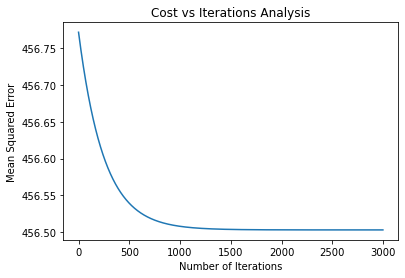

In [ ]:
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(iterations),costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

In [ ]:
# Prediction

# Generate a data point like before
X_test = 3*np.random.rand(10,1)
y_test = 9 + 2*X_test + np.random.rand(10,1)

# Show the data point
data_string = 'Data point: {}, {}'
print(data_string.format(X_test, y_test))

Data point: [[0.47416743]
 [2.26004183]
 [2.56169113]
 [0.62685272]
 [1.99899691]
 [1.43790703]
 [0.40005123]
 [1.47238719]
 [1.84631548]
 [1.67690842]], [[10.81437139]
 [14.47200512]
 [14.616434  ]
 [10.39304854]
 [13.31640712]
 [12.24537474]
 [10.5167645 ]
 [12.45126313]
 [13.36812765]
 [13.31896839]]


In [ ]:
# Add bias
X_b = np.c_[np.ones((len(X_test),1)), X_test]

# predict with optimal parameters
prediction = X_b.dot(params)
prediction

array([[10.39110901],
       [13.96960551],
       [14.57404384],
       [10.69705649],
       [13.44652933],
       [12.32222958],
       [10.24259657],
       [12.39132018],
       [13.1405896 ],
       [12.80113539]])

In [ ]:
score = float(sum(np.round(prediction) == np.round(y_test)))/ float(len(y_test))
score

0.7

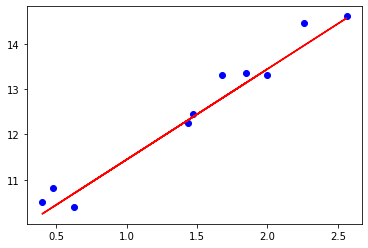

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="original")
plt.plot(X_test, prediction, color="red", label="predicted")